# Linear Regression
Within this activity, we're going to try to predict how much someone will be charged depending on their medical symptoms. The dataset that we'll be working with consists of 7 columns (age, sex, bmi, children, smoker, region, and charges) and we'll be doing the following:
- Loading in the dataset
- Checking if there are any NaN variables
- One-hot encoding the categorical variables
- Univariate Regression: Split the data into a training/testing set using only BMI and charges.
- Univariate Regression: Train our model using the training dataset
- Univariate Regression: Predict on our test set and come up with an MAE metric
- Multivariate Regression: Split the data into a training/testing set using all variables
- Multivariate Regression: Trin our model using the training dataset
- Multivariate Regression: Predict on our test set and come up with an MAE metric

### Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Load in the dataset
data = pd.read_csv("./data/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
#FYI don't forget to preprocess (not the focus of this activity)

In [2]:
# Check each variable to see if there are any NaNs. If so, delete these rows.
for column in data.columns:
    print(column, data[column].isnull().sum())

age 0
sex 0
bmi 0
children 0
smoker 0
region 0
charges 0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [5]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [6]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
# One Hot Encode the categorical variables.
# NOTE: Feel free to use this function or if you want to truly understand how this works, you can do it yourself :)
def _transform_column_into_dummies(dataframe, name_of_column):
    dummies = pd.get_dummies(dataframe[name_of_column], prefix=f"{name_of_column} = ")
    
    dataframe = pd.concat([dataframe, dummies], axis=1)
    
    dataframe = dataframe.drop([name_of_column], axis=1)
    
    return dataframe

In [8]:
# one hot encode sex
# n.b. need to assign to data each time
_transform_column_into_dummies(data, "sex")

,age,bmi,children,smoker,region,charges,sex = _female,sex = _male
0,19,27.900,0,yes,southwest,16884.92400,True,False
1,18,33.770,1,no,southeast,1725.55230,False,True
2,28,33.000,3,no,southeast,4449.46200,False,True
3,33,22.705,0,no,northwest,21984.47061,False,True
4,32,28.880,0,no,northwest,3866.85520,False,True
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,False,True
1334,18,31.920,0,no,northeast,2205.98080,True,False
1335,18,36.850,0,no,southeast,1629.83350,True,False
1336,21,25.800,0,no,southwest,2007.94500,True,False


In [9]:
# one hot encode smoker
_transform_column_into_dummies(data, "smoker")

,age,sex,bmi,children,region,charges,smoker = _no,smoker = _yes
0,19,female,27.900,0,southwest,16884.92400,False,True
1,18,male,33.770,1,southeast,1725.55230,True,False
2,28,male,33.000,3,southeast,4449.46200,True,False
3,33,male,22.705,0,northwest,21984.47061,True,False
4,32,male,28.880,0,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,True,False
1334,18,female,31.920,0,northeast,2205.98080,True,False
1335,18,female,36.850,0,southeast,1629.83350,True,False
1336,21,female,25.800,0,southwest,2007.94500,True,False


In [10]:
#one hot encode region
_transform_column_into_dummies(data, "region")

,age,sex,bmi,children,smoker,charges,region = _northeast,region = _northwest,region = _southeast,region = _southwest
0,19,female,27.900,0,yes,16884.92400,False,False,False,True
1,18,male,33.770,1,no,1725.55230,False,False,True,False
2,28,male,33.000,3,no,4449.46200,False,False,True,False
3,33,male,22.705,0,no,21984.47061,False,True,False,False
4,32,male,28.880,0,no,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,False,True,False,False
1334,18,female,31.920,0,no,2205.98080,True,False,False,False
1335,18,female,36.850,0,no,1629.83350,False,False,True,False
1336,21,female,25.800,0,no,2007.94500,False,False,False,True


In [37]:
# see encoding above was encoding only one column at a time
# exact same thing as above, but less explict
data_encoded = pd.get_dummies(data=data, columns = ['sex', 'smoker', 'region'])
data_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


### Univariate Regression
To understand how Linear Regression works with one variable, we're going to use only `BMI` in order to predict `charges`. In a real world situation, using only a single variable to predict another variable is never done. However, what we're going to do is first train/predict using only `BMI` and then compare these predictions via our error metric (Mean Absolute Error or MAE) to a model that's trained with all variables. What do you think will perform better?

Text(0, 0.5, 'Charges')

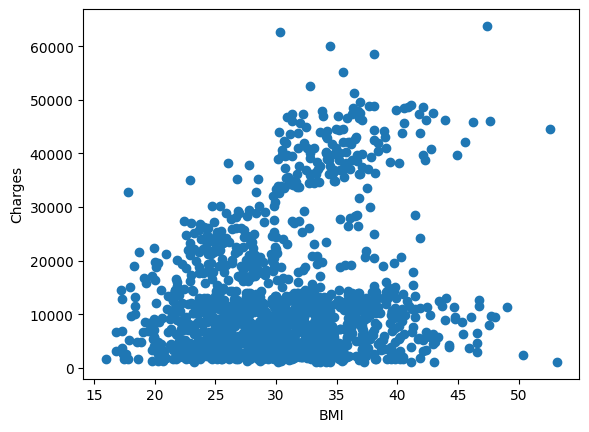

In [12]:
plt.scatter(data['bmi'], data['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')

In [13]:
# Univariate Regression: Using ONLY bmi, split the dataset into an 80/20 training/testing split with predicting charges.

### NOTE: Only partial code is given! ###
X = pd.DataFrame(data["bmi"])
y = data["charges"]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

<Axes: xlabel='bmi', ylabel='charges'>

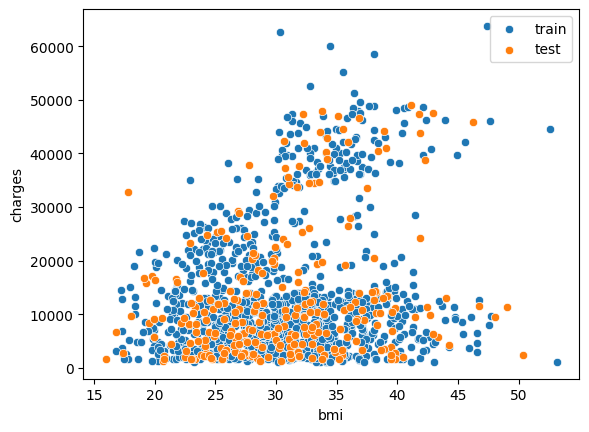

In [15]:
# Univariate Regression: For practice, plot the BMI/Charges in a scatter plot such that the observation's color depends on whether it is in the training or testing set.
sns.scatterplot(x=X_train['bmi'], y=y_train, label='train')
sns.scatterplot(x=X_test['bmi'], y=y_test, label='test')

In [16]:
# Univariate Regression: Train a linear regression model using only the training set.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
print('univariate beta_0 is',lr.intercept_)
print('univariate beta_1 is', lr.coef_)

univariate beta_0 is 1799.6966914104523
univariate beta_1 is [375.05700596]


In [18]:
# Univariate Regression: Predict on the test set and save these predictions to a variable.
predicted_charges_based_on_bmi = lr.predict(X_test)

In [19]:
# Univariate Regression: What is the MAE of the dataset?
# Mean absolute error regression loss (i.e. mean difference between predicted and actual value is nearly 10,000 (charges))
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predicted_charges_based_on_bmi)

9192.89303275989

In [20]:
# Univariate Regression: Challenging Question: If you were to repeat this step without adding any extra parameters 
# to your previous code, the results will be different. Why would this be the case? Think about the datasets that 
# were created. By looking into the documentation, which parameter could you change to make sure this is the same?

In [21]:
# the random argument of the sci kit train test split function is none by default meaning each time the dataset is split it is random, so the linear regresion and predications will have a degree of variation. to give a consistant shiffling of the dataset assign an integer to the random argument.

In [ ]:
# use random = integer if want to compare models so know error is associated with model and not variation regression

### Multivariate Regression
Now, that we have an MAE for our univariate case, let's use all variables in order to train and predict!

In [22]:
# Multivariate Regression: Now using all of the variables within your dataset, what are the data types of each column?
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
data_encoded.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female             bool
sex_male               bool
smoker_no              bool
smoker_yes             bool
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [24]:
# Multivariate Regression: Split the entire dataset using all columns into a 80/20 training and testing split.

In [39]:
#X2 = pd.DataFrame(data_encoded) - need to drop charges (obviously!)
X2 = data_encoded.drop(["charges"], axis=1)
y2 = data_encoded["charges"]

In [40]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=True)

In [27]:
# Multivariate Regression: Train and Predict on the test set.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X2_train, y2_train)

LinearRegression()

In [42]:
print('multivariate beta_0 is',lr.intercept_)
print('multivariate beta_1 is', lr.coef_)

multivariate beta_0 is -2125.7756151542453
multivariate beta_1 is [   262.73414693    379.33004665    512.45245552    145.20107203
   -145.20107203 -12004.41917405  12004.41917405    564.84518694
     59.73178477   -247.28491857   -377.29205315]


In [43]:
predicted_charges_based_on_all = lr.predict(X2_test)

In [31]:
# Multivariate Regression: What is the MAE of the dataset? Did the performance increase or decrease from 
# the univariate case?

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y2_test, predicted_charges_based_on_all)

4442.313287179957

In [33]:
# the performance massively increased, I almost don't believe the number ... have I done something wrong!

In [34]:
# Multivariate Regression: Challenging Question: If you were to increase age by one unit _while holding all other
# variables constant_, how much would the charges increase by? How did you figure this out?

In [35]:
# I would change add one to the age and repeat analysis, this would change the b0 and b1 values, but hopefully it should be as accurate

In [ ]:
# if increasing by 1 can look at b1 and that will be the increase, so long as not changing anything